In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter


Shape: (47, 136, 3)


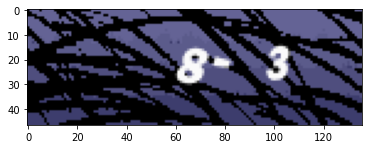

In [144]:
image_path = "argonclick/numbers/107.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
print("Shape: {}".format(image.shape))

In [145]:
kmean = KMeans(n_clusters=3)

In [146]:
modified_image = image.reshape(image.shape[0] * image.shape[1], 3)
labels = kmean.fit_predict(modified_image)
counts = Counter(labels)
counts = {
    key: value
    for key, value in sorted(counts.items(), key=lambda item: item[1], reverse=True)
}
center_colors = kmean.cluster_centers_
ordered_colors = [center_colors[i] for i in counts.keys()]
rgb_colors = [rgbconvert(color) for color in ordered_colors]
background = rgb_colors[1] if rgb_colors[0] == [0, 0, 0] else rgb_colors[0]
background

[84, 83, 131]

In [116]:
md=[]
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
for i in range(1,21):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(modified_image)
    o=kmeans.inertia_
    md.append(o)
print(md)

[126251495.21340322, 26293152.29055147, 4229901.315986897, 1847307.6546786537, 594324.6934397727, 55687.798462613464, 11808.758747135196, 6602.738725490176, 4030.2387254902005, 1955.755952380945, 1193.541450253922, 700.8849999999981, 398.384999999999, 278.59333333333285, 208.37904761904724, 158.19571428571322, 122.28343299232046, 79.54571428571352, 54.61670020120673, 40.28571428571383]


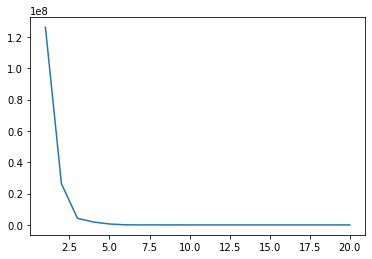

In [117]:
plt.plot(list(np.arange(1,21)),md)
plt.show()

In [17]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [2]:
def rgbconvert(colors):
    return [int(color) for color in colors]

In [142]:
clf = KMeans(n_clusters = 3)
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
labels = clf.fit_predict(modified_image)
counts = Counter(labels)
# sort to ensure correct color percentage
# counts = dict(sorted(counts.items()))
counts = {key: value for key, value in sorted(counts.items(), key=lambda item: item[1], reverse=True)}

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(color) for color in ordered_colors]
# rgb_colors = [ordered_colors[i] for i in counts.keys()]
rgb_colors = [rgbconvert(color) for color in ordered_colors]


In [143]:
rgb_colors

[[0, 0, 0], [84, 83, 131], [235, 235, 239]]

In [19]:
def func(pct, allvalues):
    absolute = int(pct / 100.*sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

([<matplotlib.patches.Wedge at 0x7fe16ea899d0>,
 [Text(-0.13106266539802464, 1.0921641716055173, '#000000'),
  Text(-0.22916118754574724, -1.0758648382220803, '#6f8d62'),
  Text(1.0408968670461818, -0.3557157744231253, '#e3f9e6')],
 [Text(-0.07148872658074071, 0.5957259117848275, '53.8%\n(3438)'),
  Text(-0.12499701138858939, -0.5868353663029529, '35.7%\n(2283)'),
  Text(0.5677619274797354, -0.1940267860489774, '10.5%\n(669)')])

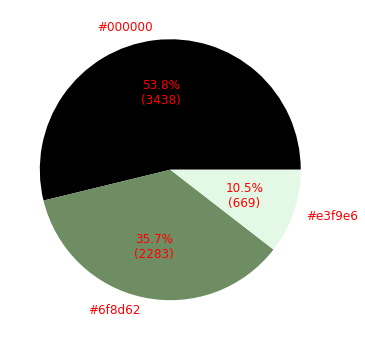

In [120]:
plt.figure(figsize = (8, 6))
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors, autopct = lambda pct: func(pct, counts.values()),
        textprops = dict(color ="red", size = 'larger'))

In [121]:
from IPython.display import Markdown

for i, color in enumerate(rgb_colors):
    print()
    display(Markdown(f'<span style="color: {hex_colors[i]}"> {color} - {hex_colors[i]}</span>'))


<span style="color: #000000"> [0, 0, 0] - #000000</span>

<span style="color: #6f8d62"> [111, 141, 98] - #6f8d62</span>

<span style="color: #e3f9e6"> [227, 249, 230] - #e3f9e6</span>

# main colors

- <span style="color: #6f8d62"> [111, 141, 98] </span>
- <span style="color: #6f8d61"> [111, 141, 97] </span>
- <span style="color: #6e8c61"> (110, 140, 97) </span>


- <span style="color: #535283"> (83, 82, 131) </span>
- <span style="color: #525282"> (82, 82, 130) </span>
- <span style="color: #535383"> (83, 83, 131) </span>
- <span style="color: #525182"> (82, 81, 130) </span>
- <span style="color: #525283"> [82, 82, 131] </span>

In [11]:
purple = [[81, 81, 129], [82, 81, 130], [82, 82, 130], [82, 82, 131], [83, 82, 131], [83, 83, 131], [84, 83, 131], 
         [84, 83, 132], [84, 84, 131], [84, 84, 132]]
green = [[98, 128, 85], [99, 128, 85], [99, 129, 85], [109, 139, 96], [110, 140, 96], [110, 140, 97], [111, 140, 98],
         [111, 141, 98], [111, 141, 97], [111, 142, 98], [112, 141, 98], [112, 141, 99], [112, 142, 98], [112, 142, 99]]

In [114]:
purple_count = 0
green_count = 0
path = "argonclick/stars/"
images = os.listdir(path)

for image_name in images:
    image = cv2.imread(path + image_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    clf = KMeans(n_clusters = 3)

    modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    counts = {key: value for key, value in sorted(counts.items(), key=lambda item: item[1], reverse=True)}
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    rgb_colors = [rgbconvert(color) for color in ordered_colors]
    
    background = rgb_colors[1] if rgb_colors[0] == [0, 0, 0] else rgb_colors[0]
    
    if background[0] in range(80, 85):
        purple_count += 1
    elif background[0] in range(108, 113) or background[0] in range(98, 100):
        green_count += 1
    else:
        print(image_path)
        print(f"new color: {background}")

print("purple images count: ", purple_count)
print("green images count: ", green_count)

purple images count:  245
green images count:  264


In [13]:
def color_change(image, orig_rgb: list, change_rgb:list):
    image[np.where((image==orig_rgb).all(axis=2))] = change_rgb
    return image

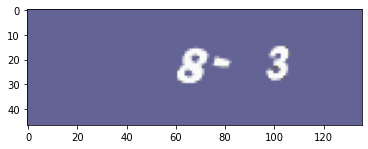

In [147]:
# purple background reduce noise
moded = color_change(image.copy(), (0, 0, 0), (100, 99, 149))
color_change(moded, (61, 60, 109), (100, 99, 149))
color_change(moded, [109, 140, 95] , (100, 99, 149))
color_change(moded, (91, 91, 139), (100, 99, 149))
color_change(moded, (95, 95, 144), (100, 99, 149))
color_change(moded, (68, 68, 116), (100, 99, 149))
color_change(moded, (61, 61, 109), (100, 99, 149))
color_change(moded, (79, 78, 126), (100, 99, 149))
color_change(moded, (31, 31, 31), (100, 99, 149))
color_change(moded, (62, 62, 62), (100, 99, 149))
plt.imshow(moded)

In [148]:
type(moded)

numpy.ndarray

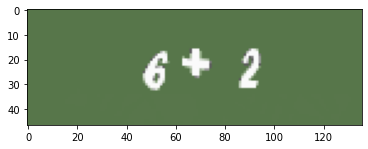

In [129]:
# green background reduce noice
moded = color_change(image.copy(), (0, 0, 0), [87, 118, 74])
color_change(moded, (138, 168, 125), [87, 118, 74])
color_change(moded, (78, 78, 126), [87, 118, 74])
color_change(moded, (110, 140, 96), [87, 118, 74])
color_change(moded, (31, 31, 31), [87, 118, 74])
color_change(moded, (62, 62, 62), [87, 118, 74])

plt.imshow(moded)

In [130]:
cv2.imwrite("argonclick/filtered2.png", moded)

True

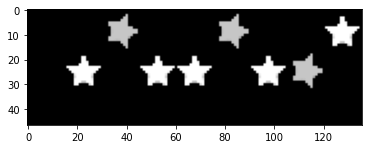

In [123]:
gray = cv2.cvtColor(moded, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")

In [104]:
canny = cv2.Canny(gray, 28, 47, L2gradient=True)

dilated = cv2.dilate(canny, (2, 2), iterations=5)

contours, _ = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

1


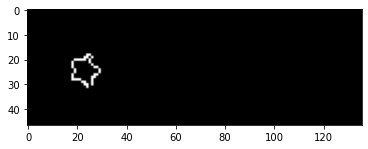

In [105]:
plt.imshow(canny, cmap="gray")

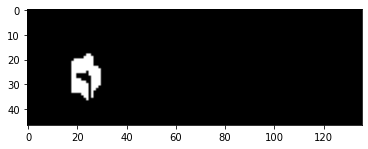

In [106]:
plt.imshow(dilated, cmap="gray")

contours:  1 star count:  1


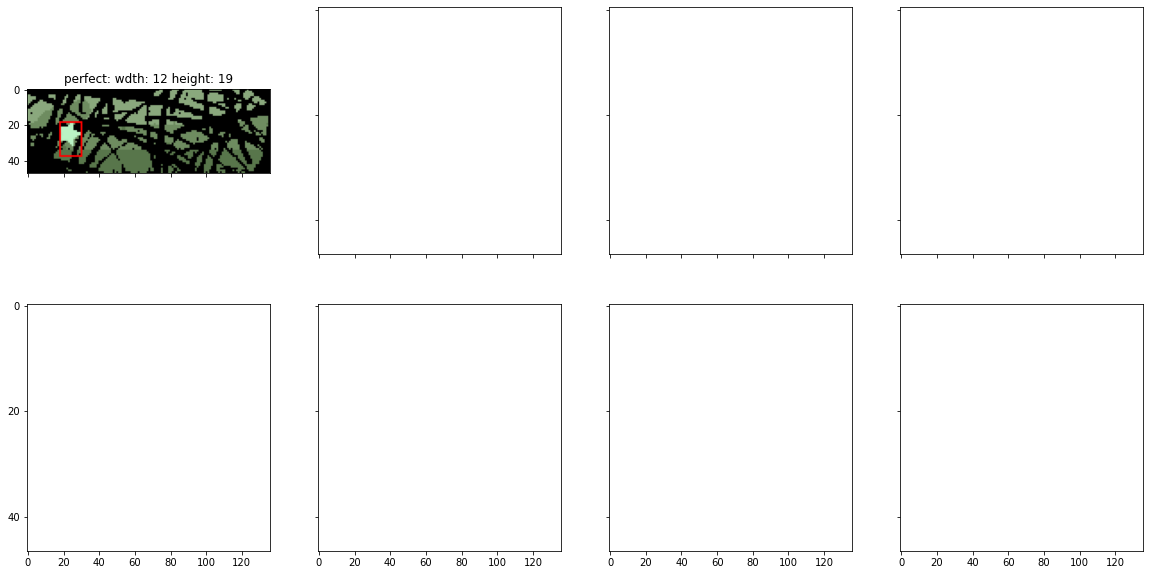

In [107]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
ax = axes.ravel()

count = 0
for i, contour in enumerate(contours):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    (x, y, w, h) = cv2.boundingRect(contour)
    
    ax[i].imshow(cv2.rectangle(image, (x, y), (x+w,y+h), (255, 0, 0), 1), "gray")
    
    if (12 <= w <= 19) and (12 <= h <= 19):
        ax[i].set_title(f"perfect: wdth: {w} height: {h}")
        count += 1
    elif w > 19:
        value = round(w/16)
        ax[i].set_title(f"width is high: wdth: {w} height: {h}")
        count += value
    elif h > 19:
        value = round(h/16)
        ax[i].set_title(f"height is high: wdth: {w} height: {h}")
        count += value
    else:
        ax[i].set_title(f"skipped: wdth: {w} height: {h}")

print("contours: ", len(contours), "star count: ", count)
plt.show()